In [1]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd

encodings = ['utf-8', 'latin1', 'cp1252', 'ISO-8859-1']

file_path = '/content/spam.csv'

for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f'File successfully read with encoding : {encoding}')

        break

    except UnicodeDecodeError:
        print(f'Error reading file with encoding : {encoding}')
        continue


if 'df' in locals():
    print('csv file has successfully loaded.')
else:
    print('all encoding attempts failed. unable to read the csv file.')

Error reading file with encoding : utf-8
File successfully read with encoding : latin1
csv file has successfully loaded.


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2443,ham,&lt;#&gt; great loxahatchee xmas tree burning...,NaN,NaN,NaN
1579,ham,"Why is that, princess? I bet the brothas are a...",NaN,NaN,NaN
2763,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
2491,ham,"Greetings me, ! Consider yourself excused.",NaN,NaN,NaN
4245,ham,Well welp is sort of a semiobscure internet thing,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [9]:
df.sample(5)

,v1,v2
2830,ham,Thanx 4 sending me home...
4502,ham,Stupid.its not possible
4774,ham,So many people seems to be special at first si...
905,ham,Hey what's up charles sorry about the late reply.
4147,spam,Please call Amanda with regard to renewing or ...


In [10]:
# renaming the cols
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace= True)
df.sample(5)

,target,text
778,ham,Happy New year my dear brother. I really do mi...
3927,ham,Babe ? I lost you ... Will you try rebooting ?
220,ham,Ok no prob. Take ur time.
825,ham,Hmm .. Bits and pieces lol ... *sighs* ...
3643,ham,* Thought I didn't see you.


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

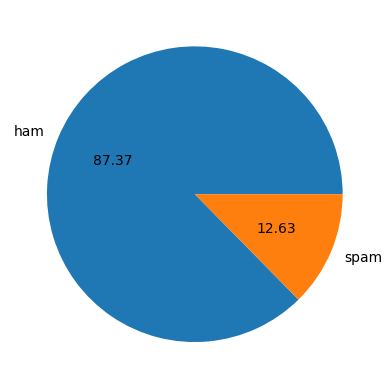

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

Data Exploration

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

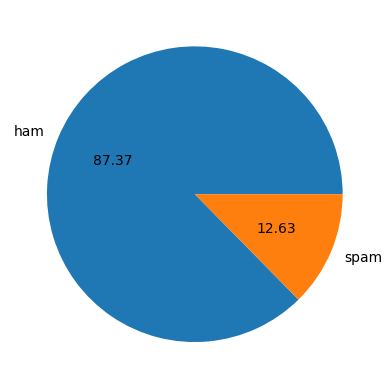

In [24]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [25]:
# Big chunk of ham and very less spam so out data is not balanced

In [26]:
import nltk

In [27]:
!pip install nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_characters'] = df['text'].apply(len)   #number of char

In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # words count

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) # sentences count

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [38]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

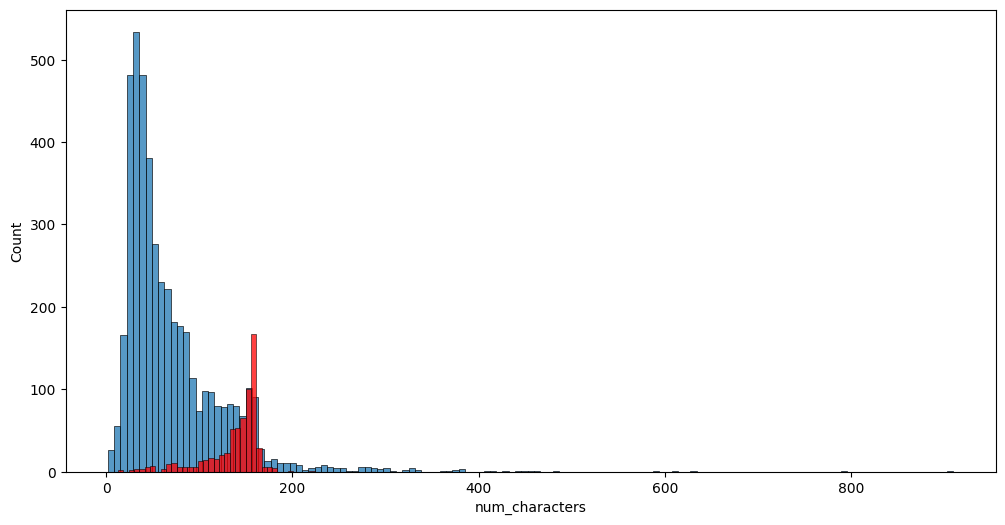

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

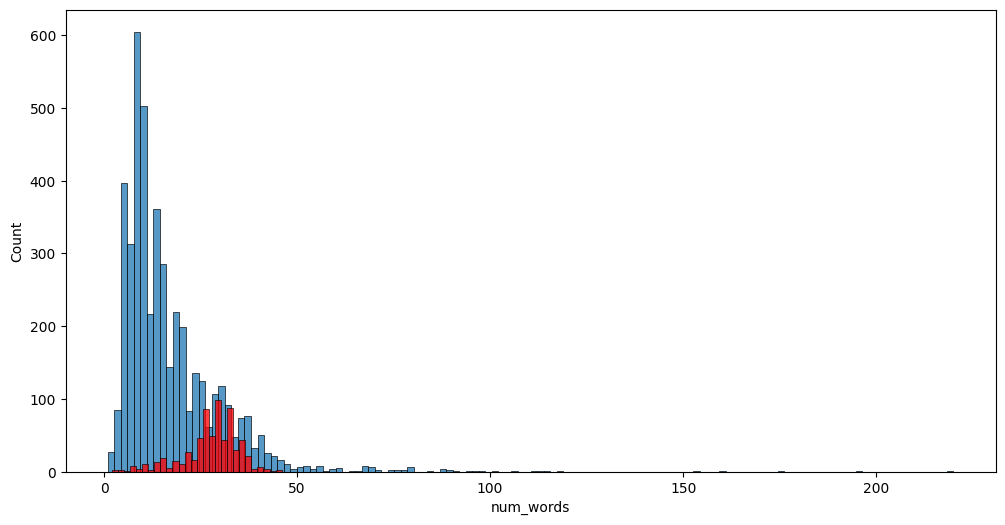

In [40]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

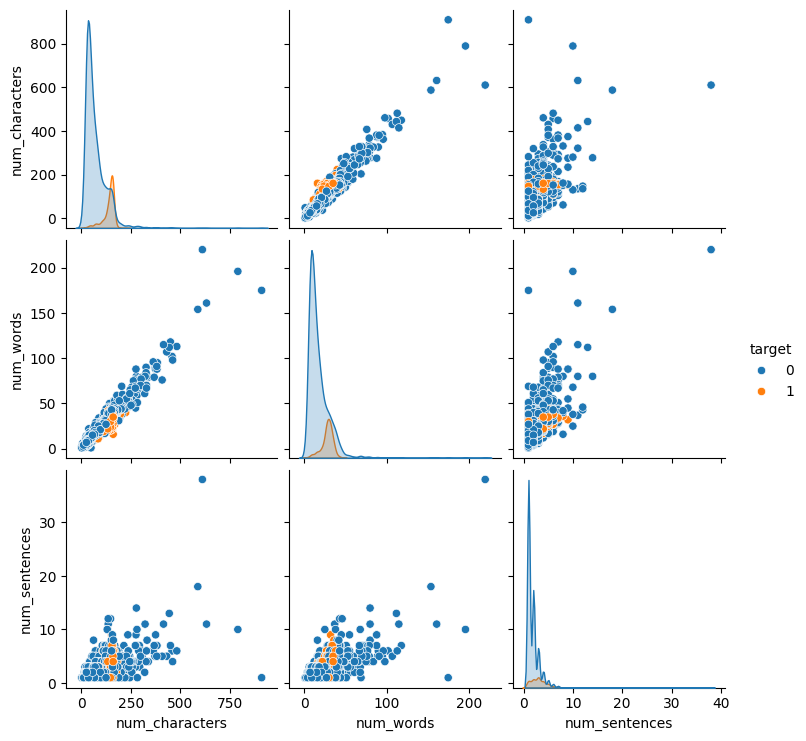

In [41]:
sns.pairplot(df, hue='target')

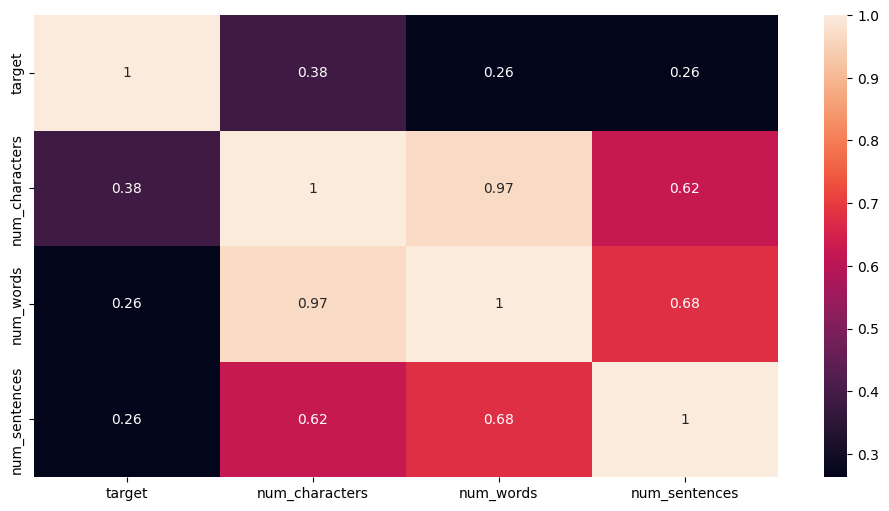

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number']) # Select only columns with numeric data

# Calculate correlation and plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), annot=True) # Calculate correlation on the numeric DataFrame
plt.show()

Data preProcessing


*   Lower case
*   Tokenization
-Removing special characters
-Removing stop words and punctuation
-stemming





In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)

    text = y[:]
    y.clear()
    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)


    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)
    transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
    print(transformed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [44]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('lovingg')

'lovingg'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

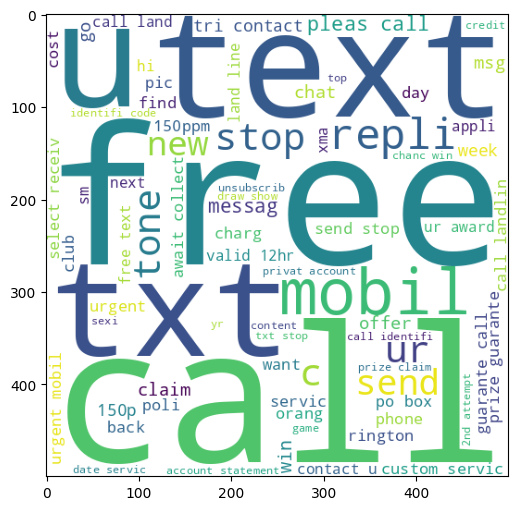

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

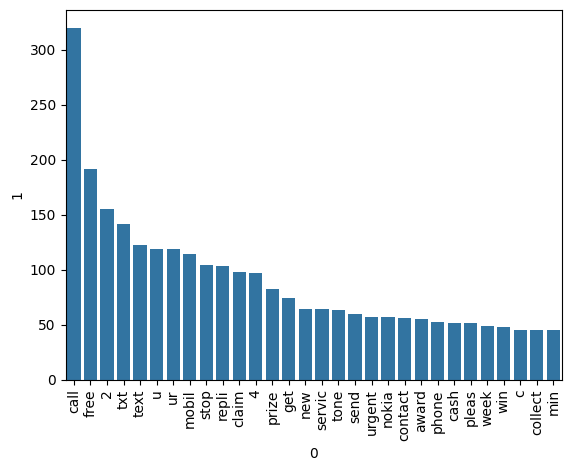

In [54]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

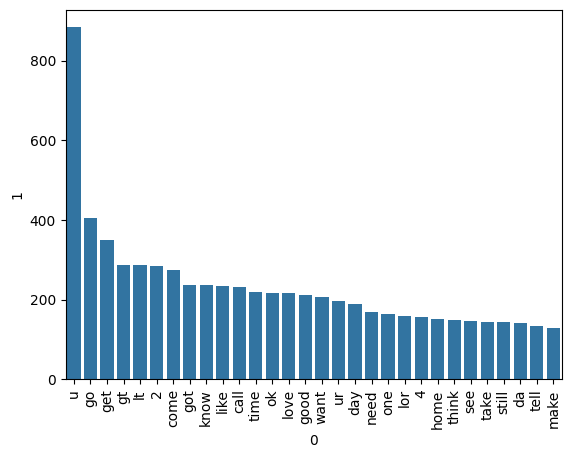

In [57]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# Text vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4.building the model

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [62]:
# appending the num_character col to x
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
x.shape

(5169, 6708)

In [64]:
y = df['target'].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
from tkinter.constants import X
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [70]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [71]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [72]:
# tfidf  --> MNB

In [73]:
!pip install xgboost

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier (n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [78]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [79]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9235976789168279
Precision -  0.9154929577464789
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
4,LR,0.970986,0.973684
10,xgb,0.973888,0.966387
6,AdaBoost,0.963250,0.946429
9,GBDT,0.943907,0.944444
7,BgC,0.962282,0.915966
3,DT,0.923598,0.915493
2,NB,0.964217,0.834437


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,LR,Accuracy,0.970986
4,xgb,Accuracy,0.973888
5,AdaBoost,Accuracy,0.963250
6,GBDT,Accuracy,0.943907
7,BgC,Accuracy,0.962282
8,DT,Accuracy,0.923598
9,NB,Accuracy,0.964217


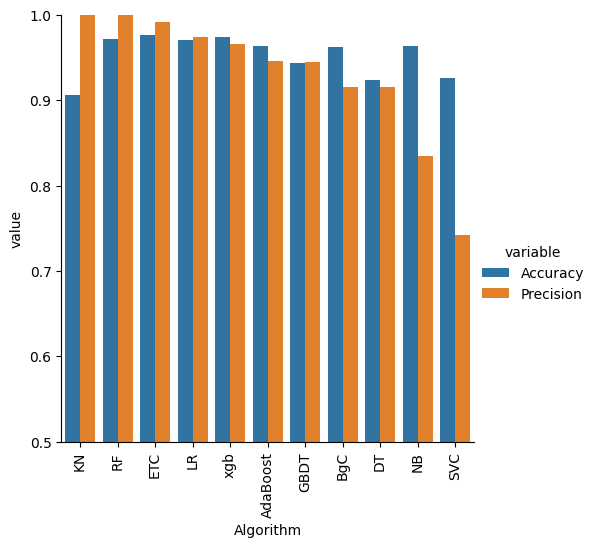

In [84]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
# model improve
# 1. change the max_features parameter of TfIdf

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False) # Sort by 'Precision_num_chars' instead of 'Precision_scaling'

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
4,xgb,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387,0.973888,0.966387
5,AdaBoost,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429,0.963250,0.946429
6,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
7,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
8,DT,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493,0.923598,0.915493
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [91]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [92]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [93]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [94]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [95]:
#Applying stcking
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [96]:
from sklearn.ensemble import StackingClassifier

In [97]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [98]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9845261121856866
Precision 0.9765625


In [99]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [100]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ['Sample text 1', 'Sample text 2', 'Sample text 3']
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)


mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)